In [1]:
import matplotlib as mat
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import pi
from windrose import WindroseAxes
import xarray as xr
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd
from netCDF4 import Dataset
import os, rasterio
from datetime import datetime
from math import sqrt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
path = 'F:/Wind_Vector/Excel_Data/'; date_format = "%Y %m %d %H"
df_AQSEA_VN_001 = pd.read_excel(path + "Meteorological_Data_35_32.xlsx", parse_dates=[['Year', 'Month', 'Day', 'Hour']], date_format=date_format, header=0, index_col=0)
df_AQSEA_VN_006 = pd.read_excel(path + "Meteorological_Data_34_34.xlsx", parse_dates=[['Year', 'Month', 'Day', 'Hour']], date_format=date_format, header=0, index_col=0)
df_AQSEA_VN_014 = pd.read_excel(path + "Meteorological_Data_30_63.xlsx", parse_dates=[['Year', 'Month', 'Day', 'Hour']], date_format=date_format, header=0, index_col=0)
df_AQSEA_VN_022 = pd.read_excel(path + "Meteorological_Data_53_51.xlsx", parse_dates=[['Year', 'Month', 'Day', 'Hour']], date_format=date_format, header=0, index_col=0)
df_XuanDieuQuangAn = pd.read_excel(path + "Meteorological_Data_37_33.xlsx", parse_dates=[['Year', 'Month', 'Day', 'Hour']], date_format=date_format, header=0, index_col=0)
df_AQSEA_VN_001.drop('Unnamed: 0', axis=1, inplace=True)
df_AQSEA_VN_001.reset_index(inplace=True)
df_AQSEA_VN_006.drop('Unnamed: 0', axis=1, inplace=True)
df_AQSEA_VN_006.reset_index(inplace=True)
df_AQSEA_VN_014.drop('Unnamed: 0', axis=1, inplace=True)
df_AQSEA_VN_014.reset_index(inplace=True)
df_AQSEA_VN_022.drop('Unnamed: 0', axis=1, inplace=True)
df_AQSEA_VN_022.reset_index(inplace=True)
df_XuanDieuQuangAn.drop('Unnamed: 0', axis=1, inplace=True)
df_XuanDieuQuangAn.reset_index(inplace=True)

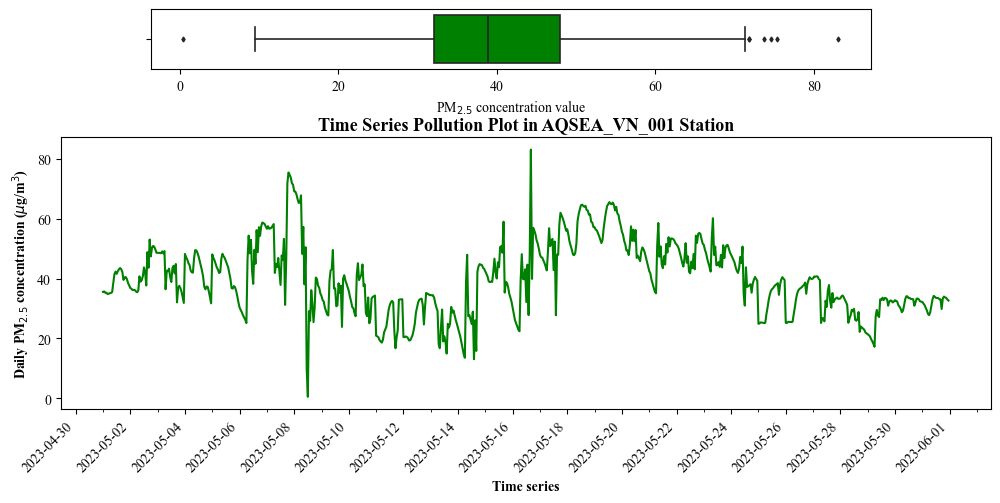

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Specify the path to the Times New Roman TTF file
times_new_roman_path = 'F:/Fonts/times.ttf'

# Register the font with Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (12, 4)

# Time series plot, type of line chart
fig, ax1 = plt.subplots()

# Plot the data
ax1.plot(df_AQSEA_VN_001['Year_Month_Day_Hour'].values, df_AQSEA_VN_001['PM2.5'].values, color='green')
ax1.set_title('Time Series Pollution Plot in AQSEA_VN_001 Station', fontsize=13, weight="bold")
ax1.set_xlabel('Time series', fontsize=10, weight="bold")
ax1.set_ylabel(r'Daily PM$_{2.5}$ concentration ($\mu$g/m$^3$)', fontsize=10, weight="bold")

# Improve the formatting of the x-axis
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Set major ticks to every 2 days
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Set minor ticks to every 1 day
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

fig.autofmt_xdate(rotation=45)  # Rotate date labels

# Box plot
left, bottom, width, height = [0.2, 1.05, 0.60, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
sns.boxplot(x="PM2.5", data=df_AQSEA_VN_001, color='green', fliersize=2.5, linewidth=1.2, saturation=1.5, ax=ax2)
ax2.set_xlabel('PM$_{2.5}$ concentration value')
ax2.set_ylabel(' ')

# Save time series plot
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_AQSEA_VN_001_Small.jpg', format='jpg', dpi=500)
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_AQSEA_VN_001_Large.jpg', format='jpg', dpi=1000)

plt.show()


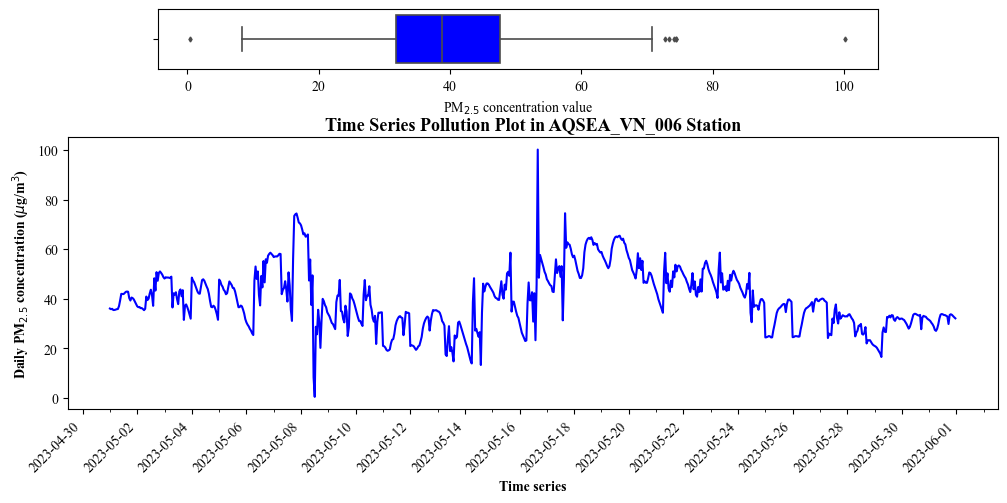

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the path to the Times New Roman TTF file
times_new_roman_path = 'F:/Fonts/times.ttf'

# Register the font with Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (12, 4)

# Time series plot, type of line chart
fig, ax1 = plt.subplots()
ax1.plot(df_AQSEA_VN_006['Year_Month_Day_Hour'].values, df_AQSEA_VN_006['PM2.5'].values, color='blue')
ax1.set_title('Time Series Pollution Plot in AQSEA_VN_006 Station', fontsize=13, weight="bold")
ax1.set_xlabel('Time series', fontsize=10, weight="bold")
ax1.set_ylabel(r'Daily PM$_{2.5}$ concentration ($\mu$g/m$^3$)', fontsize=10, weight="bold")

# Improve the formatting of the x-axis
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Set major ticks to every 2 days
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Set minor ticks to every 1 day
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)  # Rotate date labels

# Box plot
left, bottom, width, height = [0.2, 1.05, 0.60, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2 = sns.boxplot(x="PM2.5", data=df_AQSEA_VN_006, color='blue', fliersize=2.5, linewidth=1.2, saturation=1.5, ax=ax2)
ax2.set_xlabel('PM$_{2.5}$ concentration value')
ax2.set_ylabel(' ')

# Save time series plot
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_AQSEA_VN_006_Small.jpg', format='jpg', dpi=500)
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_AQSEA_VN_006_Large.jpg', format='jpg', dpi=1000)

plt.show()


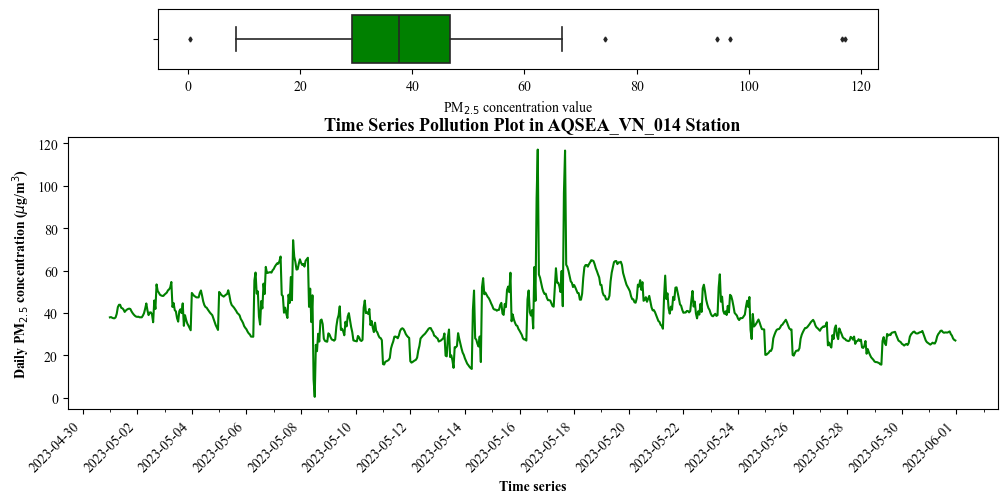

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the path to the Times New Roman TTF file
times_new_roman_path = 'F:/Fonts/times.ttf'

# Register the font with Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (12, 4)

# Time series plot, type of line chart
fig, ax1 = plt.subplots()
ax1.plot(df_AQSEA_VN_014['Year_Month_Day_Hour'].values, df_AQSEA_VN_014['PM2.5'].values, color='green')
ax1.set_title('Time Series Pollution Plot in AQSEA_VN_014 Station', fontsize=13, weight="bold")
ax1.set_xlabel('Time series', fontsize=10, weight="bold")
ax1.set_ylabel(r'Daily PM$_{2.5}$ concentration ($\mu$g/m$^3$)', fontsize=10, weight="bold")

# Improve the formatting of the x-axis
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Set major ticks to every 2 days
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Set minor ticks to every 1 day
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)  # Rotate date labels

# Box plot
left, bottom, width, height = [0.2, 1.05, 0.60, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2 = sns.boxplot(x="PM2.5", data=df_AQSEA_VN_014, color='green', fliersize=2.5, linewidth=1.2, saturation=1.5, ax=ax2)
ax2.set_xlabel('PM$_{2.5}$ concentration value')
ax2.set_ylabel(' ')

# Save time series plot
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_AQSEA_VN_014_Small.jpg', format='jpg', dpi=500)
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_AQSEA_VN_014_Large.jpg', format='jpg', dpi=1000)

plt.show()


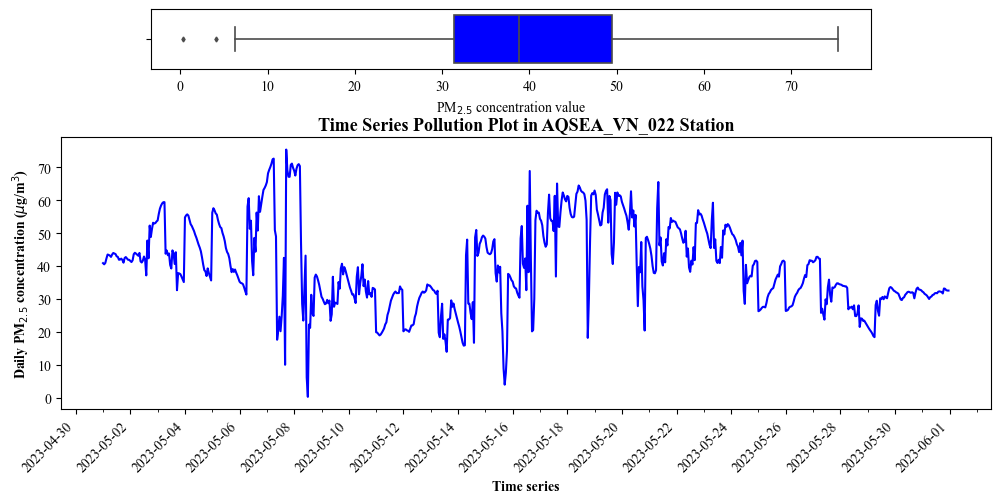

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the path to the Times New Roman TTF file
times_new_roman_path = 'F:/Fonts/times.ttf'

# Register the font with Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (12, 4)

# Time series plot, type of line chart
fig, ax1 = plt.subplots()
ax1.plot(df_AQSEA_VN_022['Year_Month_Day_Hour'].values, df_AQSEA_VN_022['PM2.5'].values, color='blue')
ax1.set_title('Time Series Pollution Plot in AQSEA_VN_022 Station', fontsize=13, weight="bold")
ax1.set_xlabel('Time series', fontsize=10, weight="bold")
ax1.set_ylabel(r'Daily PM$_{2.5}$ concentration ($\mu$g/m$^3$)', fontsize=10, weight="bold")

# Improve the formatting of the x-axis
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Set major ticks to every 2 days
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Set minor ticks to every 1 day
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)  # Rotate date labels

# Box plot
left, bottom, width, height = [0.2, 1.05, 0.60, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2 = sns.boxplot(x="PM2.5", data=df_AQSEA_VN_022, color='blue', fliersize=2.5, linewidth=1.2, saturation=1.5, ax=ax2)
ax2.set_xlabel('PM$_{2.5}$ concentration value')
ax2.set_ylabel(' ')

# Save time series plot
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_AQSEA_VN_022_Small.jpg', format='jpg', dpi=500)
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_AQSEA_VN_022_Large.jpg', format='jpg', dpi=1000)

plt.show()


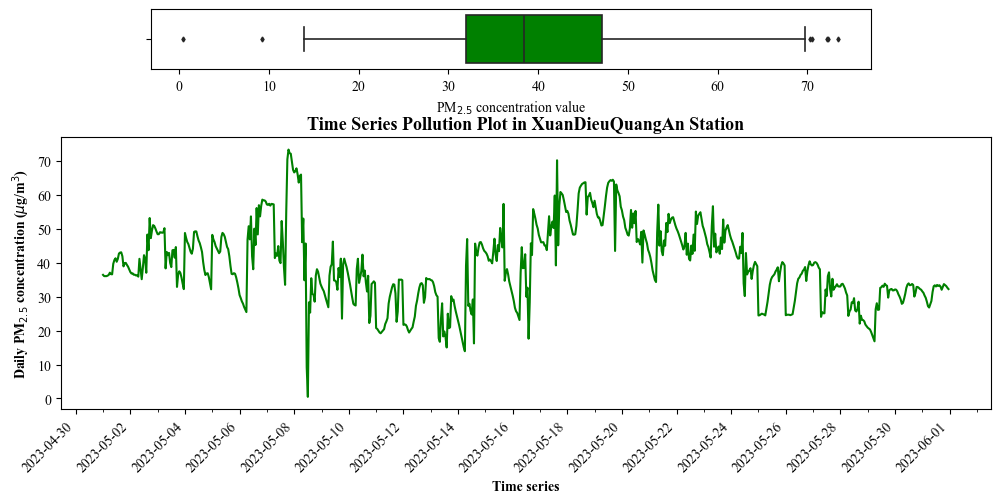

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the path to the Times New Roman TTF file
times_new_roman_path = 'F:/Fonts/times.ttf'

# Register the font with Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (12, 4)

# Time series plot, type of line chart
fig, ax1 = plt.subplots()
ax1.plot(df_XuanDieuQuangAn['Year_Month_Day_Hour'].values, df_XuanDieuQuangAn['PM2.5'].values, color='green')
ax1.set_title('Time Series Pollution Plot in XuanDieuQuangAn Station', fontsize=13, weight="bold")
ax1.set_xlabel('Time series', fontsize=10, weight="bold")
ax1.set_ylabel(r'Daily PM$_{2.5}$ concentration ($\mu$g/m$^3$)', fontsize=10, weight="bold")

# Improve the formatting of the x-axis
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Set major ticks to every 2 days
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Set minor ticks to every 1 day
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)  # Rotate date labels

# Box plot
left, bottom, width, height = [0.2, 1.05, 0.60, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2 = sns.boxplot(x="PM2.5", data=df_XuanDieuQuangAn, color='green', fliersize=2.5, linewidth=1.2, saturation=1.5, ax=ax2)
ax2.set_xlabel('PM$_{2.5}$ concentration value')
ax2.set_ylabel(' ')

# Save time series plot
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_XuanDieuQuangAn_Small.jpg', format='jpg', dpi=500)
fig.savefig('F:/Wind_Vector/PM25_graph/PM25_XuanDieuQuangAn_Large.jpg', format='jpg', dpi=1000)

plt.show()


In [8]:
path = 'F:/Wind_Vector/Excel_Data/'; date_format = "%Y %m %d %H"
df_AQSEA_VN_001 = pd.read_excel(path + "Meteorological_Data_35_32.xlsx", header=0, index_col=0)
df_AQSEA_VN_006 = pd.read_excel(path + "Meteorological_Data_34_34.xlsx", header=0, index_col=0)
df_AQSEA_VN_014 = pd.read_excel(path + "Meteorological_Data_30_63.xlsx", header=0, index_col=0)
df_AQSEA_VN_022 = pd.read_excel(path + "Meteorological_Data_53_51.xlsx", header=0, index_col=0)
df_XuanDieuQuangAn = pd.read_excel(path + "Meteorological_Data_37_33.xlsx", header=0, index_col=0)
list_columns = ['PBL','TEMP','PRES','WSPEED','WDIR','RH', 'RAIN']
meanAQSEA_VN_001 = pd.DataFrame(df_AQSEA_VN_001.groupby('Hour')[list_columns].mean().reset_index(), columns=['Hour', 'PBL','TEMP','PRES','WSPEED','WDIR','RH', 'RAIN'])
meanAQSEA_VN_006 = pd.DataFrame(df_AQSEA_VN_006.groupby('Hour')[list_columns].mean().reset_index(), columns=['Hour', 'PBL','TEMP','PRES','WSPEED','WDIR','RH', 'RAIN'])
meanAQSEA_VN_014 = pd.DataFrame(df_AQSEA_VN_014.groupby('Hour')[list_columns].mean().reset_index(), columns=['Hour', 'PBL','TEMP','PRES','WSPEED','WDIR','RH', 'RAIN'])
meanAQSEA_VN_022 = pd.DataFrame(df_AQSEA_VN_022.groupby('Hour')[list_columns].mean().reset_index(), columns=['Hour', 'PBL','TEMP','PRES','WSPEED','WDIR','RH', 'RAIN'])
meanXuanDieuQuangAn = pd.DataFrame(df_XuanDieuQuangAn.groupby('Hour')[list_columns].mean().reset_index(), columns=['Hour', 'PBL','TEMP','PRES','WSPEED','WDIR','RH', 'RAIN'])

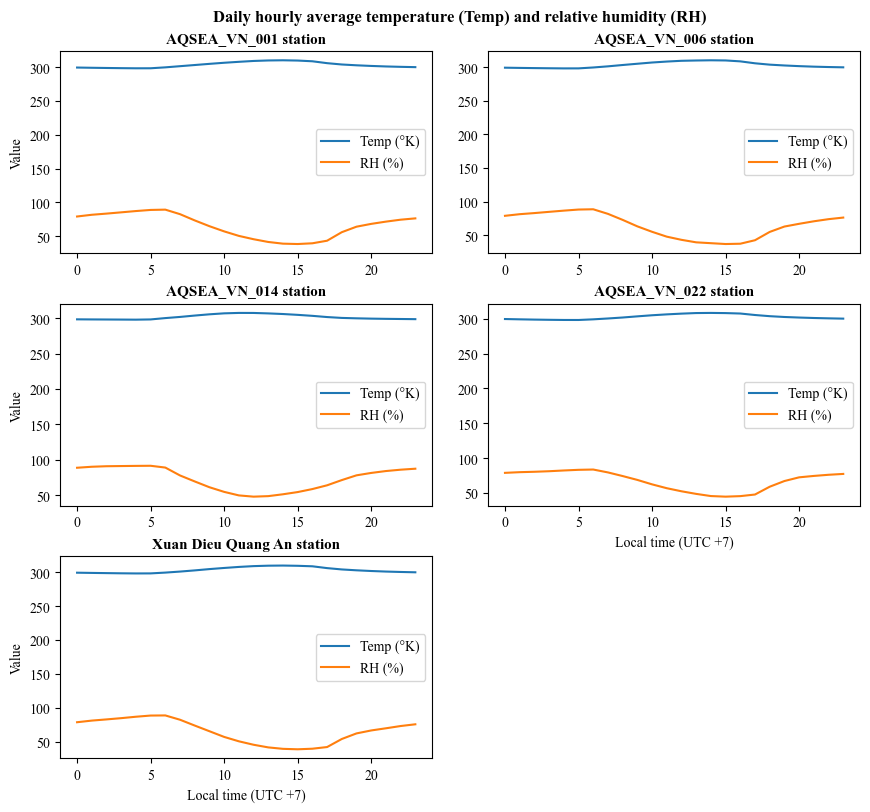

In [9]:
plt.rcParams['figure.figsize'] = (10, 12)
fig = plt.figure()
# 1. AQSEA_VN_001 station
ax1 = fig.add_subplot(4,2,1)
ax1.plot(meanAQSEA_VN_001["Hour"].values, meanAQSEA_VN_001["TEMP"].values)
ax1.plot(meanAQSEA_VN_001["Hour"].values, meanAQSEA_VN_001["RH"].values)
ax1.set_title('AQSEA_VN_001 station', fontsize=11, weight="bold")
ax1.set_xlabel(' ')
ax1.set_ylabel('Value', fontsize=10)
ax1.legend(['Temp (\u00B0K)', 'RH (%)'], loc='center right')

# 2. AQSEA_VN_006 station
ax2 = fig.add_subplot(4,2,2)
ax2.plot(meanAQSEA_VN_006["Hour"].values, meanAQSEA_VN_006["TEMP"].values)
ax2.plot(meanAQSEA_VN_006["Hour"].values, meanAQSEA_VN_006["RH"].values)
ax2.set_title('AQSEA_VN_006 station', fontsize=11, weight="bold")
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')
ax2.legend(['Temp (\u00B0K)', 'RH (%)'], loc='center right')

# 3. AQSEA_VN_014 station
ax3 = fig.add_subplot(4,2,3)
ax3.plot(meanAQSEA_VN_014["Hour"].values, meanAQSEA_VN_014["TEMP"].values)
ax3.plot(meanAQSEA_VN_014["Hour"].values, meanAQSEA_VN_014["RH"].values)
ax3.set_title('AQSEA_VN_014 station', fontsize=11, weight="bold")
ax3.set_xlabel(' ')
ax3.set_ylabel('Value', fontsize=10)
ax3.legend(['Temp (\u00B0K)', 'RH (%)'], loc='center right')

# 4. AQSEA_VN_022 station
ax4 = fig.add_subplot(4,2,4)
ax4.plot(meanAQSEA_VN_022["Hour"].values, meanAQSEA_VN_022["TEMP"].values)
ax4.plot(meanAQSEA_VN_022["Hour"].values, meanAQSEA_VN_022["RH"].values)
ax4.set_title('AQSEA_VN_022 station', fontsize=11, weight="bold")
ax4.set_xlabel('Local time (UTC +7)')
ax4.set_ylabel(' ')
ax4.legend(['Temp (\u00B0K)', 'RH (%)'], loc='center right')

# 5. Xuan Dieu Quang An station
ax5 = fig.add_subplot(4,2,5)
ax5.plot(meanXuanDieuQuangAn["Hour"].values, meanXuanDieuQuangAn["TEMP"].values)
ax5.plot(meanXuanDieuQuangAn["Hour"].values, meanXuanDieuQuangAn["RH"].values)
ax5.set_title('Xuan Dieu Quang An station', fontsize=11, weight="bold")
ax5.set_xlabel('Local time (UTC +7)')
ax5.set_ylabel('Value', fontsize=10)
ax5.legend(['Temp (\u00B0K)', 'RH (%)'], loc='center right')

# Main graph title
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.25)
plt.suptitle("Daily hourly average temperature (Temp) and relative humidity (RH)", weight="bold", fontsize=12, y=0.935)
plt.show()

# Save time series plot
fig.savefig('F:/Wind_Vector/Meteorology_graph/Daily hourly average Temp & RH.jpg', format='jpg', dpi=500)
fig.savefig('F:/Wind_Vector/Meteorology_graph/Daily hourly average Temp & RH_large.jpg', format='jpg', dpi=1000)

In [10]:
min_value, max_value = meanAQSEA_VN_001['TEMP'].min(), meanAQSEA_VN_001['TEMP'].max()
print(f"Minimum value of Temperature of AQSEA_VN_001: {min_value}")
print(f"Maximum value of Temperature of AQSEA_VN_001: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_006['TEMP'].min(), meanAQSEA_VN_006['TEMP'].max()
print(f"Minimum value of Temperature of AQSEA_VN_006: {min_value}")
print(f"Maximum value of Temperature of AQSEA_VN_006: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_014['TEMP'].min(), meanAQSEA_VN_014['TEMP'].max()
print(f"Minimum value of Temperature of AQSEA_VN_014: {min_value}")
print(f"Maximum value of Temperature of AQSEA_VN_014: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_022['TEMP'].min(), meanAQSEA_VN_022['TEMP'].max()
print(f"Minimum value of Temperature of AQSEA_VN_022: {min_value}")
print(f"Maximum value of Temperature of AQSEA_VN_022: {max_value}")
print("-" * 30)
min_value, max_value = meanXuanDieuQuangAn['TEMP'].min(), meanXuanDieuQuangAn['TEMP'].max()
print(f"Minimum value of Temperature of XuanDieuQuangAn: {min_value}")
print(f"Maximum value of Temperature of XuanDieuQuangAn: {max_value}")


print("-" * 100)


min_value, max_value = meanAQSEA_VN_001['RH'].min(), meanAQSEA_VN_001['RH'].max()
print(f"Minimum value of RH of AQSEA_VN_001: {min_value}")
print(f"Maximum value of RH of AQSEA_VN_001: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_006['RH'].min(), meanAQSEA_VN_006['RH'].max()
print(f"Minimum value of RH of AQSEA_VN_006: {min_value}")
print(f"Maximum value of RH of AQSEA_VN_006: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_014['RH'].min(), meanAQSEA_VN_014['RH'].max()
print(f"Minimum value of RH of AQSEA_VN_014: {min_value}")
print(f"Maximum value of RH of AQSEA_VN_014: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_022['RH'].min(), meanAQSEA_VN_022['RH'].max()
print(f"Minimum value of RH of AQSEA_VN_022: {min_value}")
print(f"Maximum value of RH of AQSEA_VN_022: {max_value}")
print("-" * 30)
min_value, max_value = meanXuanDieuQuangAn['RH'].min(), meanXuanDieuQuangAn['RH'].max()
print(f"Minimum value of RH of XuanDieuQuangAn: {min_value}")
print(f"Maximum value of RH of XuanDieuQuangAn: {max_value}")

Minimum value of Temperature of AQSEA_VN_001: 298.2493689752394
Maximum value of Temperature of AQSEA_VN_001: 310.08387510238157
------------------------------
Minimum value of Temperature of AQSEA_VN_006: 298.35668256205895
Maximum value of Temperature of AQSEA_VN_006: 310.42293523973035
------------------------------
Minimum value of Temperature of AQSEA_VN_014: 297.8125659573463
Maximum value of Temperature of AQSEA_VN_014: 307.3285532305318
------------------------------
Minimum value of Temperature of AQSEA_VN_022: 298.11502370526716
Maximum value of Temperature of AQSEA_VN_022: 308.2369237099924
------------------------------
Minimum value of Temperature of XuanDieuQuangAn: 298.34708133820567
Maximum value of Temperature of XuanDieuQuangAn: 309.99669425718247
----------------------------------------------------------------------------------------------------
Minimum value of RH of AQSEA_VN_001: 38.400180509013516
Maximum value of RH of AQSEA_VN_001: 89.24665044969127
------------

In [11]:
df_AQSEA_VN_001_filter = df_AQSEA_VN_001[(df_AQSEA_VN_001['Hour'] >= 10) & (df_AQSEA_VN_001['Hour'] <= 15)]
df_AQSEA_VN_006_filter = df_AQSEA_VN_006[(df_AQSEA_VN_006['Hour'] >= 10) & (df_AQSEA_VN_006['Hour'] <= 15)]
df_AQSEA_VN_014_filter = df_AQSEA_VN_014[(df_AQSEA_VN_014['Hour'] >= 10) & (df_AQSEA_VN_014['Hour'] <= 15)]
df_AQSEA_VN_022_filter = df_AQSEA_VN_022[(df_AQSEA_VN_022['Hour'] >= 10) & (df_AQSEA_VN_022['Hour'] <= 15)]
df_XuanDieuQuangAn_filter = df_XuanDieuQuangAn[(df_XuanDieuQuangAn['Hour'] >= 10) & (df_XuanDieuQuangAn['Hour'] <= 15)]
meanAQSEA_VN_001_filter = pd.DataFrame(df_AQSEA_VN_001_filter.groupby('Hour')['RH'].mean().reset_index(), columns=['RH'])
meanAQSEA_VN_006_filter = pd.DataFrame(df_AQSEA_VN_006_filter.groupby('Hour')['RH'].mean().reset_index(), columns=['RH'])
meanAQSEA_VN_014_filter = pd.DataFrame(df_AQSEA_VN_014_filter.groupby('Hour')['RH'].mean().reset_index(), columns=['RH'])
meanAQSEA_VN_022_filter = pd.DataFrame(df_AQSEA_VN_022_filter.groupby('Hour')['RH'].mean().reset_index(), columns=['RH'])
meanXuanDieuQuangAn_filter = pd.DataFrame(df_XuanDieuQuangAn_filter.groupby('Hour')['RH'].mean().reset_index(), columns=['RH'])
minval = min(meanAQSEA_VN_006_filter['RH'].min(), meanAQSEA_VN_001_filter['RH'].min(), meanAQSEA_VN_014_filter['RH'].min(), 
             meanAQSEA_VN_022_filter['RH'].min(), meanXuanDieuQuangAn_filter['RH'].min())
maxval = max(meanAQSEA_VN_006_filter['RH'].max(), meanAQSEA_VN_001_filter['RH'].max(), meanAQSEA_VN_014_filter['RH'].max(), 
             meanAQSEA_VN_022_filter['RH'].max(), meanXuanDieuQuangAn_filter['RH'].max())
print('giá trị thấp nhất của RH từ 10 -> 15 giờ: ', minval)
print('giá trị lớn nhất của RH từ 10 -> 15 giờ: ', maxval)

meanAQSEA_VN_001_filter = pd.DataFrame(df_AQSEA_VN_001_filter.groupby('Hour')['TEMP'].mean().reset_index(), columns=['TEMP'])
meanAQSEA_VN_006_filter = pd.DataFrame(df_AQSEA_VN_006_filter.groupby('Hour')['TEMP'].mean().reset_index(), columns=['TEMP'])
meanAQSEA_VN_014_filter = pd.DataFrame(df_AQSEA_VN_014_filter.groupby('Hour')['TEMP'].mean().reset_index(), columns=['TEMP'])
meanAQSEA_VN_022_filter = pd.DataFrame(df_AQSEA_VN_022_filter.groupby('Hour')['TEMP'].mean().reset_index(), columns=['TEMP'])
meanXuanDieuQuangAn_filter = pd.DataFrame(df_XuanDieuQuangAn_filter.groupby('Hour')['TEMP'].mean().reset_index(), columns=['TEMP'])
minval = min(meanAQSEA_VN_006_filter['TEMP'].min(), meanAQSEA_VN_001_filter['TEMP'].min(), meanAQSEA_VN_014_filter['TEMP'].min(), 
             meanAQSEA_VN_022_filter['TEMP'].min(), meanXuanDieuQuangAn_filter['TEMP'].min())
maxval = max(meanAQSEA_VN_006_filter['TEMP'].max(), meanAQSEA_VN_001_filter['TEMP'].max(), meanAQSEA_VN_014_filter['TEMP'].max(), 
             meanAQSEA_VN_022_filter['TEMP'].max(), meanXuanDieuQuangAn_filter['TEMP'].max())
print('giá trị thấp nhất của TEMP từ 10 -> 15 giờ: ', minval)
print('giá trị lớn nhất của TEMP từ 10 -> 15 giờ: ', maxval)

giá trị thấp nhất của RH từ 10 -> 15 giờ:  36.92133085189327
giá trị lớn nhất của RH từ 10 -> 15 giờ:  62.488568582842426
giá trị thấp nhất của TEMP từ 10 -> 15 giờ:  304.5991919732863
giá trị lớn nhất của TEMP từ 10 -> 15 giờ:  310.42293523973035


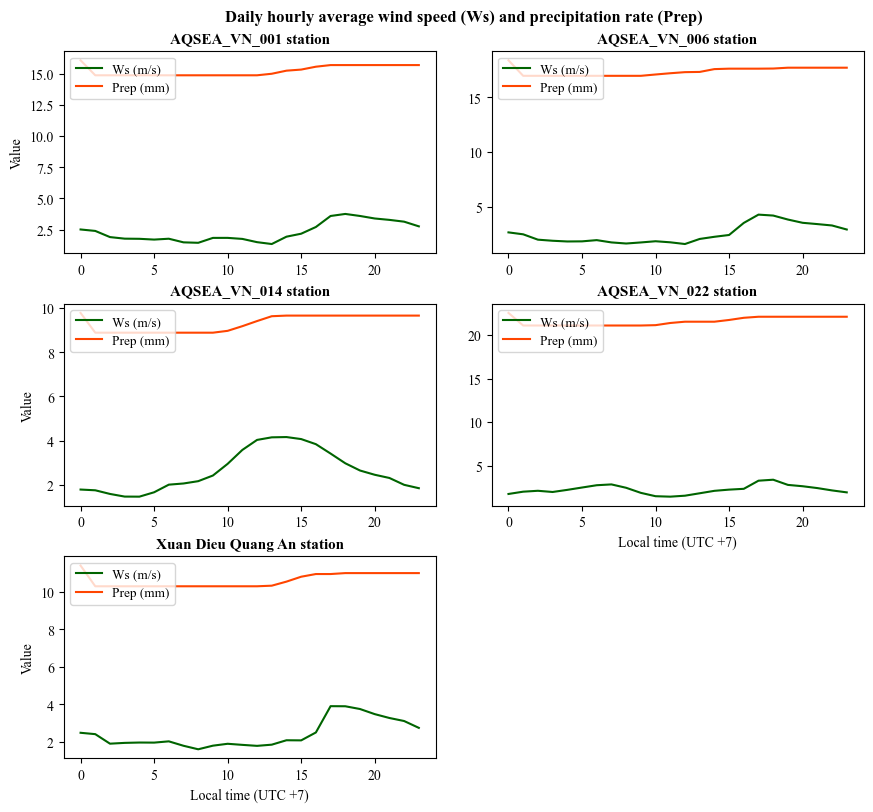

In [12]:
plt.rcParams['figure.figsize'] = (10, 12)
fig = plt.figure()
# 1. AQSEA_VN_039 station
ax1 = fig.add_subplot(4,2,1)
ax1.plot(meanAQSEA_VN_001["Hour"].values, meanAQSEA_VN_001["WSPEED"].values, color="darkgreen") # Wind speed
ax1.plot(meanAQSEA_VN_001["Hour"].values, meanAQSEA_VN_001["RAIN"].values, color="orangered") # Precipitation rate
ax1.set_title('AQSEA_VN_001 station', fontsize=11, weight="bold")
ax1.set_xlabel(' ')
ax1.set_ylabel('Value', fontsize=10)
ax1.legend(['Ws (m/s)', 'Prep (mm)'], fontsize=9.5, loc='upper left')

# 2. AQSEA_VN_027 station
ax2 = fig.add_subplot(4,2,2)
ax2.plot(meanAQSEA_VN_006["Hour"].values, meanAQSEA_VN_006["WSPEED"].values, color="darkgreen") # Wind speed
ax2.plot(meanAQSEA_VN_006["Hour"].values, meanAQSEA_VN_006["RAIN"].values, color="orangered") # Precipitation rate
ax2.set_title('AQSEA_VN_006 station', fontsize=11, weight="bold")
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')
ax2.legend(['Ws (m/s)', 'Prep (mm)'], fontsize=9.5, loc='upper left')

# 3. AQSEA_VN_031 station
ax3 = fig.add_subplot(4,2,3)
ax3.plot(meanAQSEA_VN_014["Hour"].values, meanAQSEA_VN_014["WSPEED"].values, color="darkgreen") # Wind speed
ax3.plot(meanAQSEA_VN_014["Hour"].values, meanAQSEA_VN_014["RAIN"].values, color="orangered") # Precipitation rate
ax3.set_title('AQSEA_VN_014 station', fontsize=11, weight="bold")
ax3.set_xlabel(' ')
ax3.set_ylabel('Value', fontsize=10)
ax3.legend(['Ws (m/s)', 'Prep (mm)'], fontsize=9.5, loc='upper left')

# 4. AQSEA_VN_032 station
ax4 = fig.add_subplot(4,2,4)
ax4.plot(meanAQSEA_VN_022["Hour"].values, meanAQSEA_VN_022["WSPEED"].values, color="darkgreen") # Wind speed
ax4.plot(meanAQSEA_VN_022["Hour"].values, meanAQSEA_VN_022["RAIN"].values, color="orangered") # Precipitation rate
ax4.set_title('AQSEA_VN_022 station', fontsize=11, weight="bold")
ax4.set_xlabel('Local time (UTC +7)')
ax4.set_ylabel(' ')
ax4.legend(['Ws (m/s)', 'Prep (mm)'], fontsize=9.5, loc='upper left')

# 5. VNU-HCM station
ax5 = fig.add_subplot(4,2,5)
ax5.plot(meanXuanDieuQuangAn["Hour"].values, meanXuanDieuQuangAn["WSPEED"].values, color="darkgreen") # Wind speed
ax5.plot(meanXuanDieuQuangAn["Hour"].values, meanXuanDieuQuangAn["RAIN"].values, color="orangered") # Precipitation rate
ax5.set_title('Xuan Dieu Quang An station', fontsize=11, weight="bold")
ax5.set_xlabel('Local time (UTC +7)')
ax5.set_ylabel('Value', fontsize=10)
ax5.legend(['Ws (m/s)', 'Prep (mm)'], fontsize=9.5, loc='upper left')

# Main graph title
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.25)
plt.suptitle("Daily hourly average wind speed (Ws) and precipitation rate (Prep)", weight="bold", fontsize=12, y=0.935)
plt.show()

# Save time series plot
fig.savefig('F:/Wind_Vector/Meteorology_graph/Daily hourly average Ws & Prep.jpg', format='jpg', dpi=500)
fig.savefig('F:/Wind_Vector/Meteorology_graph/Daily hourly average Ws & Prep_large.jpg', format='jpg', dpi=1000)

In [13]:
print('Hour of AQSEA_VN_001 maximum Wind Speed: ', meanAQSEA_VN_001['WSPEED'].idxmax())
print('Hour of AQSEA_VN_006 maximum Wind Speed: ', meanAQSEA_VN_006['WSPEED'].idxmax())
print('Hour of AQSEA_VN_014 maximum Wind Speed: ', meanAQSEA_VN_014['WSPEED'].idxmax())
print('Hour of AQSEA_VN_022 maximum Wind Speed: ', meanAQSEA_VN_022['WSPEED'].idxmax())
print('Hour of Xuan Dieu Quang An maximum Wind Speed: ', meanXuanDieuQuangAn['WSPEED'].idxmax())

Hour of AQSEA_VN_001 maximum Wind Speed:  18
Hour of AQSEA_VN_006 maximum Wind Speed:  17
Hour of AQSEA_VN_014 maximum Wind Speed:  14
Hour of AQSEA_VN_022 maximum Wind Speed:  18
Hour of Xuan Dieu Quang An maximum Wind Speed:  17


In [14]:
min_value, max_value = meanAQSEA_VN_001['WSPEED'].min(), meanAQSEA_VN_001['WSPEED'].max()
print(f"Minimum value of Wind Speed of AQSEA_VN_001: {min_value}")
print(f"Maximum value of Wind Speed of AQSEA_VN_001: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_006['WSPEED'].min(), meanAQSEA_VN_006['WSPEED'].max()
print(f"Minimum value of Wind Speed of AQSEA_VN_006: {min_value}")
print(f"Maximum value of Wind Speed of AQSEA_VN_006: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_014['WSPEED'].min(), meanAQSEA_VN_014['WSPEED'].max()
print(f"Minimum value of Wind Speed of AQSEA_VN_014: {min_value}")
print(f"Maximum value of Wind Speed of AQSEA_VN_014: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_022['WSPEED'].min(), meanAQSEA_VN_022['WSPEED'].max()
print(f"Minimum value of Wind Speed of AQSEA_VN_022: {min_value}")
print(f"Maximum value of Wind Speed of AQSEA_VN_022: {max_value}")
print("-" * 30)
min_value, max_value = meanXuanDieuQuangAn['WSPEED'].min(), meanXuanDieuQuangAn['WSPEED'].max()
print(f"Minimum value of Wind Speed of Xuan Dieu Quang An: {min_value}")
print(f"Maximum value of Wind Speed of Xuan Dieu Quang An: {max_value}")


print("-" * 100)


min_value, max_value = meanAQSEA_VN_001['RAIN'].min(), meanAQSEA_VN_001['RAIN'].max()
print(f"Minimum value of Rain of AQSEA_VN_001: {min_value}")
print(f"Maximum value of Rain of AQSEA_VN_001: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_006['RAIN'].min(), meanAQSEA_VN_006['RAIN'].max()
print(f"Minimum value of Rain of AQSEA_VN_006: {min_value}")
print(f"Maximum value of Rain of AQSEA_VN_006: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_014['RAIN'].min(), meanAQSEA_VN_014['RAIN'].max()
print(f"Minimum value of Rain of AQSEA_VN_014: {min_value}")
print(f"Maximum value of Rain of AQSEA_VN_014: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_022['RAIN'].min(), meanAQSEA_VN_022['RAIN'].max()
print(f"Minimum value of Rain of AQSEA_VN_022: {min_value}")
print(f"Maximum value of Rain of AQSEA_VN_022: {max_value}")
print("-" * 30)
min_value, max_value = meanXuanDieuQuangAn['RAIN'].min(), meanXuanDieuQuangAn['RAIN'].max()
print(f"Minimum value of Rain of Xuan Dieu Quang An: {min_value}")
print(f"Maximum value of Rain of Xuan Dieu Quang An: {max_value}")

Minimum value of Wind Speed of AQSEA_VN_001: 1.3512146165294032
Maximum value of Wind Speed of AQSEA_VN_001: 3.7603886127471924
------------------------------
Minimum value of Wind Speed of AQSEA_VN_006: 1.5823670837186998
Maximum value of Wind Speed of AQSEA_VN_006: 4.273714780807495
------------------------------
Minimum value of Wind Speed of AQSEA_VN_014: 1.4638197604686982
Maximum value of Wind Speed of AQSEA_VN_014: 4.161888514795611
------------------------------
Minimum value of Wind Speed of AQSEA_VN_022: 1.429705161240793
Maximum value of Wind Speed of AQSEA_VN_022: 3.375848408668272
------------------------------
Minimum value of Wind Speed of Xuan Dieu Quang An: 1.6028336863363943
Maximum value of Wind Speed of Xuan Dieu Quang An: 3.9006404645981325
----------------------------------------------------------------------------------------------------
Minimum value of Rain of AQSEA_VN_001: 14.86604339845719
Maximum value of Rain of AQSEA_VN_001: 16.067688603555005
------------

In [15]:
df_AQSEA_VN_001_filter = df_AQSEA_VN_001[(df_AQSEA_VN_001['Hour'] >= 10) & (df_AQSEA_VN_001['Hour'] <= 17)]
df_AQSEA_VN_006_filter = df_AQSEA_VN_006[(df_AQSEA_VN_006['Hour'] >= 10) & (df_AQSEA_VN_006['Hour'] <= 17)]
df_AQSEA_VN_014_filter = df_AQSEA_VN_014[(df_AQSEA_VN_014['Hour'] >= 10) & (df_AQSEA_VN_014['Hour'] <= 17)]
df_AQSEA_VN_022_filter = df_AQSEA_VN_022[(df_AQSEA_VN_022['Hour'] >= 10) & (df_AQSEA_VN_022['Hour'] <= 17)]
df_XuanDieuQuangAn_filter = df_XuanDieuQuangAn[(df_XuanDieuQuangAn['Hour'] >= 10) & (df_XuanDieuQuangAn['Hour'] <= 17)]
meanAQSEA_VN_001_filter = pd.DataFrame(df_AQSEA_VN_001_filter.groupby('Hour')['RAIN'].mean().reset_index(), columns=['RAIN'])
meanAQSEA_VN_006_filter = pd.DataFrame(df_AQSEA_VN_006_filter.groupby('Hour')['RAIN'].mean().reset_index(), columns=['RAIN'])
meanAQSEA_VN_014_filter = pd.DataFrame(df_AQSEA_VN_014_filter.groupby('Hour')['RAIN'].mean().reset_index(), columns=['RAIN'])
meanAQSEA_VN_022_filter = pd.DataFrame(df_AQSEA_VN_022_filter.groupby('Hour')['RAIN'].mean().reset_index(), columns=['RAIN'])
meanXuanDieuQuangAn_filter = pd.DataFrame(df_XuanDieuQuangAn_filter.groupby('Hour')['RAIN'].mean().reset_index(), columns=['RAIN'])
minval = min(meanAQSEA_VN_006_filter['RAIN'].min(), meanAQSEA_VN_001_filter['RAIN'].min(), meanAQSEA_VN_014_filter['RAIN'].min(), 
             meanAQSEA_VN_022_filter['RAIN'].min(), meanXuanDieuQuangAn_filter['RAIN'].min())
maxval = max(meanAQSEA_VN_006_filter['RAIN'].max(), meanAQSEA_VN_001_filter['RAIN'].max(), meanAQSEA_VN_014_filter['RAIN'].max(), 
             meanAQSEA_VN_022_filter['RAIN'].max(), meanXuanDieuQuangAn_filter['RAIN'].max())
print('Giá trị thấp nhất của tỉ lệ mưa từ 10 -> 17 giờ: ', minval)
print('Giá trị lớn nhất của tỉ lệ mưa từ 10 -> 17 giờ: ', maxval)

Giá trị thấp nhất của tỉ lệ mưa từ 10 -> 17 giờ:  8.970653272444203
Giá trị lớn nhất của tỉ lệ mưa từ 10 -> 17 giờ:  22.09938000094506


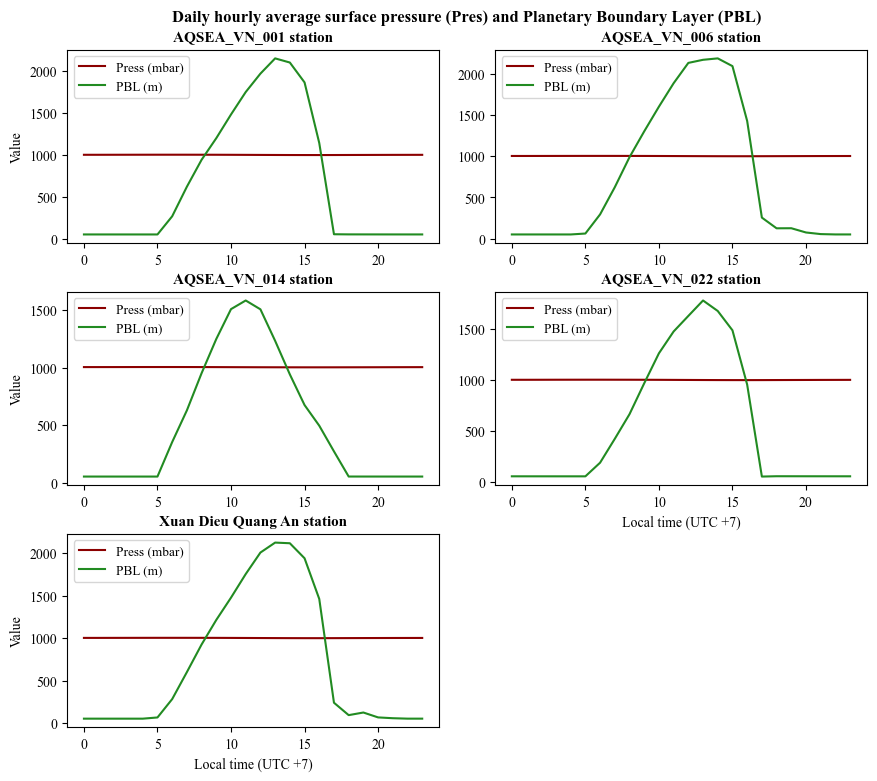

In [16]:
plt.rcParams['figure.figsize'] = (10, 11.5)
fig = plt.figure()
# 4. AQSEA_VN_001 station
ax1 = fig.add_subplot(4,2,1)
ax1.plot(meanAQSEA_VN_001["Hour"].values, meanAQSEA_VN_001["PRES"].values, color="darkred") # Surface pressure
ax1.plot(meanAQSEA_VN_001["Hour"].values, meanAQSEA_VN_001["PBL"].values, color="forestgreen") # Planetary Boundary Layer
ax1.set_title('AQSEA_VN_001 station', fontsize=11, weight="bold")
ax1.set_xlabel(' ')
ax1.set_ylabel('Value', fontsize=10)
ax1.legend(['Press (mbar)', 'PBL (m)'], fontsize=9.5, loc='upper left')

# 4. AQSEA_VN_006 station
ax4 = fig.add_subplot(4,2,2)
ax4.plot(meanAQSEA_VN_006["Hour"].values, meanAQSEA_VN_006["PRES"].values, color="darkred") # Surface pressure
ax4.plot(meanAQSEA_VN_006["Hour"].values, meanAQSEA_VN_006["PBL"].values, color="forestgreen") # Planetary Boundary Layer
ax4.set_title('AQSEA_VN_006 station', fontsize=11, weight="bold")
ax4.set_xlabel(' ')
ax4.set_ylabel(' ')
ax4.legend(['Press (mbar)', 'PBL (m)'], fontsize=9.5, loc='upper left')

# 4. AQSEA_VN_014 station
ax3 = fig.add_subplot(4,2,3)
ax3.plot(meanAQSEA_VN_014["Hour"].values, meanAQSEA_VN_014["PRES"].values, color="darkred") # Surface pressure
ax3.plot(meanAQSEA_VN_014["Hour"].values, meanAQSEA_VN_014["PBL"].values, color="forestgreen") # Planetary Boundary Layer
ax3.set_title('AQSEA_VN_014 station', fontsize=11, weight="bold")
ax3.set_xlabel(' ')
ax3.set_ylabel('Value', fontsize=10)
ax3.legend(['Press (mbar)', 'PBL (m)'], fontsize=9.5, loc='upper left')

# 4. AQSEA_VN_022 station
ax4 = fig.add_subplot(4,2,4)
ax4.plot(meanAQSEA_VN_022["Hour"].values, meanAQSEA_VN_022["PRES"].values, color="darkred") # Surface pressure
ax4.plot(meanAQSEA_VN_022["Hour"].values, meanAQSEA_VN_022["PBL"].values, color="forestgreen") # Planetary Boundary Layer
ax4.set_title('AQSEA_VN_022 station', fontsize=11, weight="bold")
ax4.set_xlabel('Local time (UTC +7)')
ax4.set_ylabel(' ')
ax4.legend(['Press (mbar)', 'PBL (m)'], fontsize=9.5, loc='upper left')

# 5. Xuan Dieu Quang An station
ax5 = fig.add_subplot(4,2,5)
ax5.plot(meanXuanDieuQuangAn["Hour"].values, meanXuanDieuQuangAn["PRES"].values, color="darkred") # Surface pressure
ax5.plot(meanXuanDieuQuangAn["Hour"].values, meanXuanDieuQuangAn["PBL"].values, color="forestgreen") # Planetary Boundary Layer
ax5.set_title('Xuan Dieu Quang An station', fontsize=11, weight="bold")
ax5.set_xlabel('Local time (UTC +7)')
ax5.set_ylabel('Value', fontsize=10)
ax5.legend(['Press (mbar)', 'PBL (m)'], fontsize=9.5, loc='upper left')

# Main graph title
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.25)
plt.suptitle("Daily hourly average surface pressure (Pres) and Planetary Boundary Layer (PBL)", weight="bold", fontsize=12, y=0.935)
plt.show()

# Save time series plot
fig.savefig('F:/Wind_Vector/Meteorology_graph/Daily hourly average Press & PBL.jpg', format='jpg', dpi=500)
fig.savefig('F:/Wind_Vector/Meteorology_graph/Daily hourly average Press & PBL_large.jpg', format='jpg', dpi=1000)

In [17]:
min_value, max_value = meanAQSEA_VN_001['PRES'].min(), meanAQSEA_VN_001['PRES'].max()
print(f"Minimum value of Pressure of AQSEA_VN_001: {min_value}")
print(f"Maximum value of Pressure of AQSEA_VN_001: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_006['PRES'].min(), meanAQSEA_VN_006['PRES'].max()
print(f"Minimum value of Pressure of AQSEA_VN_006: {min_value}")
print(f"Maximum value of Pressure of AQSEA_VN_006: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_014['PRES'].min(), meanAQSEA_VN_014['PRES'].max()
print(f"Minimum value of Pressure of AQSEA_VN_014: {min_value}")
print(f"Maximum value of Pressure of AQSEA_VN_014: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_022['PRES'].min(), meanAQSEA_VN_022['PRES'].max()
print(f"Minimum value of Pressure of AQSEA_VN_022: {min_value}")
print(f"Maximum value of Pressure of AQSEA_VN_022: {max_value}")
print("-" * 30)
min_value, max_value = meanXuanDieuQuangAn['PRES'].min(), meanXuanDieuQuangAn['PRES'].max()
print(f"Minimum value of Pressure of Xuan Dieu Quang An: {min_value}")
print(f"Maximum value of Pressure of Xuan Dieu Quang An: {max_value}")


print("-" * 100)


min_value, max_value = meanAQSEA_VN_001['PBL'].min(), meanAQSEA_VN_001['PBL'].max()
print(f"Minimum value of PBL of AQSEA_VN_001: {min_value}")
print(f"Maximum value of PBL of AQSEA_VN_001: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_006['PBL'].min(), meanAQSEA_VN_006['PBL'].max()
print(f"Minimum value of PBL of AQSEA_VN_006: {min_value}")
print(f"Maximum value of PBL of AQSEA_VN_006: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_014['PBL'].min(), meanAQSEA_VN_014['PBL'].max()
print(f"Minimum value of PBL of AQSEA_VN_014: {min_value}")
print(f"Maximum value of PBL of AQSEA_VN_014: {max_value}")
print("-" * 30)
min_value, max_value = meanAQSEA_VN_022['PBL'].min(), meanAQSEA_VN_022['PBL'].max()
print(f"Minimum value of PBL of AQSEA_VN_022: {min_value}")
print(f"Maximum value of PBL of AQSEA_VN_022: {max_value}")
print("-" * 30)
min_value, max_value = meanXuanDieuQuangAn['PBL'].min(), meanXuanDieuQuangAn['PBL'].max()
print(f"Minimum value of PBL of Xuan Dieu Quang An: {min_value}")
print(f"Maximum value of PBL of Xuan Dieu Quang An: {max_value}")

Minimum value of Pressure of AQSEA_VN_001: 999.2104158266129
Maximum value of Pressure of AQSEA_VN_001: 1003.2898739919355
------------------------------
Minimum value of Pressure of AQSEA_VN_006: 999.3333744959677
Maximum value of Pressure of AQSEA_VN_006: 1003.3402696572581
------------------------------
Minimum value of Pressure of AQSEA_VN_014: 1001.676310483871
Maximum value of Pressure of AQSEA_VN_014: 1004.2772807459677
------------------------------
Minimum value of Pressure of AQSEA_VN_022: 995.92859375
Maximum value of Pressure of AQSEA_VN_022: 999.949470766129
------------------------------
Minimum value of Pressure of Xuan Dieu Quang An: 999.2555493951613
Maximum value of Pressure of Xuan Dieu Quang An: 1003.3686592741935
----------------------------------------------------------------------------------------------------
Minimum value of PBL of AQSEA_VN_001: 52.66338668331023
Maximum value of PBL of AQSEA_VN_001: 2151.6792538550594
------------------------------
Minimum val

In [18]:
df_AQSEA_VN_001_filter = df_AQSEA_VN_001[(df_AQSEA_VN_001['Hour'] >= 10) & (df_AQSEA_VN_001['Hour'] <= 15)]
df_AQSEA_VN_006_filter = df_AQSEA_VN_006[(df_AQSEA_VN_006['Hour'] >= 10) & (df_AQSEA_VN_006['Hour'] <= 15)]
df_AQSEA_VN_014_filter = df_AQSEA_VN_014[(df_AQSEA_VN_014['Hour'] >= 10) & (df_AQSEA_VN_014['Hour'] <= 15)]
df_AQSEA_VN_022_filter = df_AQSEA_VN_022[(df_AQSEA_VN_022['Hour'] >= 10) & (df_AQSEA_VN_022['Hour'] <= 15)]
df_XuanDieuQuangAn_filter = df_XuanDieuQuangAn[(df_XuanDieuQuangAn['Hour'] >= 10) & (df_XuanDieuQuangAn['Hour'] <= 15)]
meanAQSEA_VN_006_filter = pd.DataFrame(df_AQSEA_VN_006_filter.groupby('Hour')['PRES'].mean().reset_index(), columns=['PRES'])
meanAQSEA_VN_001_filter = pd.DataFrame(df_AQSEA_VN_001_filter.groupby('Hour')['PRES'].mean().reset_index(), columns=['PRES'])
meanAQSEA_VN_014_filter = pd.DataFrame(df_AQSEA_VN_014_filter.groupby('Hour')['PRES'].mean().reset_index(), columns=['PRES'])
meanAQSEA_VN_022_filter = pd.DataFrame(df_AQSEA_VN_022_filter.groupby('Hour')['PRES'].mean().reset_index(), columns=['PRES'])
meanXuanDieuQuangAn_filter = pd.DataFrame(df_XuanDieuQuangAn_filter.groupby('Hour')['PRES'].mean().reset_index(), columns=['PRES'])
minval = min(meanAQSEA_VN_006_filter['PRES'].min(), meanAQSEA_VN_001_filter['PRES'].min(), meanAQSEA_VN_014_filter['PRES'].min(), 
             meanAQSEA_VN_022_filter['PRES'].min(), meanXuanDieuQuangAn_filter['PRES'].min())
maxval = max(meanAQSEA_VN_006_filter['PRES'].max(), meanAQSEA_VN_001_filter['PRES'].max(), meanAQSEA_VN_014_filter['PRES'].max(), 
             meanAQSEA_VN_022_filter['PRES'].max(), meanXuanDieuQuangAn_filter['PRES'].max())
print('giá trị thấp nhất của PRESSURE từ 10 đến 15 giờ: ', minval)
print('giá trị lớn nhất của PRESSURE từ 10 đến 15 giờ: ', maxval)
print("-" * 100)
df_AQSEA_VN_001_filter = df_AQSEA_VN_001[(df_AQSEA_VN_001['Hour'] >= 0) & (df_AQSEA_VN_001['Hour'] <= 6) | (df_AQSEA_VN_001['Hour'] >= 17) & (df_AQSEA_VN_001['Hour'] <= 23)]
df_AQSEA_VN_006_filter = df_AQSEA_VN_006[(df_AQSEA_VN_006['Hour'] >= 0) & (df_AQSEA_VN_006['Hour'] <= 6) | (df_AQSEA_VN_006['Hour'] >= 17) & (df_AQSEA_VN_006['Hour'] <= 23)]
df_AQSEA_VN_014_filter = df_AQSEA_VN_014[(df_AQSEA_VN_014['Hour'] >= 0) & (df_AQSEA_VN_014['Hour'] <= 6) | (df_AQSEA_VN_014['Hour'] >= 17) & (df_AQSEA_VN_014['Hour'] <= 23)]
df_AQSEA_VN_022_filter = df_AQSEA_VN_022[(df_AQSEA_VN_022['Hour'] >= 0) & (df_AQSEA_VN_022['Hour'] <= 6) | (df_AQSEA_VN_022['Hour'] >= 17) & (df_AQSEA_VN_022['Hour'] <= 23)]
df_XuanDieuQuangAn_filter = df_XuanDieuQuangAn[(df_XuanDieuQuangAn['Hour'] >= 0) & (df_XuanDieuQuangAn['Hour'] <= 6) | (df_XuanDieuQuangAn['Hour'] >= 17) & (df_XuanDieuQuangAn['Hour'] <= 23)]
meanAQSEA_VN_006_filter = pd.DataFrame(df_AQSEA_VN_006_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
meanAQSEA_VN_001_filter = pd.DataFrame(df_AQSEA_VN_001_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
meanAQSEA_VN_014_filter = pd.DataFrame(df_AQSEA_VN_014_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
meanAQSEA_VN_022_filter = pd.DataFrame(df_AQSEA_VN_022_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
meanXuanDieuQuangAn_filter = pd.DataFrame(df_XuanDieuQuangAn_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
minval = min(meanAQSEA_VN_006_filter['PBL'].min(), meanAQSEA_VN_001_filter['PBL'].min(), meanAQSEA_VN_014_filter['PBL'].min(), 
             meanAQSEA_VN_022_filter['PBL'].min(), meanXuanDieuQuangAn_filter['PBL'].min())
maxval = max(meanAQSEA_VN_006_filter['PBL'].max(), meanAQSEA_VN_001_filter['PBL'].max(), meanAQSEA_VN_014_filter['PBL'].max(), 
             meanAQSEA_VN_022_filter['PBL'].max(), meanXuanDieuQuangAn_filter['PBL'].max())
print('giá trị thấp nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: ', minval)
print('giá trị lớn nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: ', maxval)
print("-" * 100)
df_AQSEA_VN_001_filter = df_AQSEA_VN_001[(df_AQSEA_VN_001['Hour'] >= 7) & (df_AQSEA_VN_001['Hour'] <= 16)]
df_AQSEA_VN_006_filter = df_AQSEA_VN_006[(df_AQSEA_VN_006['Hour'] >= 7) & (df_AQSEA_VN_006['Hour'] <= 16)]
df_AQSEA_VN_014_filter = df_AQSEA_VN_014[(df_AQSEA_VN_014['Hour'] >= 7) & (df_AQSEA_VN_014['Hour'] <= 16)]
df_AQSEA_VN_022_filter = df_AQSEA_VN_022[(df_AQSEA_VN_022['Hour'] >= 7) & (df_AQSEA_VN_022['Hour'] <= 16)]
df_XuanDieuQuangAn_filter = df_XuanDieuQuangAn[(df_XuanDieuQuangAn['Hour'] >= 7) & (df_XuanDieuQuangAn['Hour'] <= 16)]
meanAQSEA_VN_006_filter = pd.DataFrame(df_AQSEA_VN_006_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
meanAQSEA_VN_001_filter = pd.DataFrame(df_AQSEA_VN_001_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
meanAQSEA_VN_014_filter = pd.DataFrame(df_AQSEA_VN_014_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
meanAQSEA_VN_022_filter = pd.DataFrame(df_AQSEA_VN_022_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
meanXuanDieuQuangAn_filter = pd.DataFrame(df_XuanDieuQuangAn_filter.groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
minval = min(meanAQSEA_VN_006_filter['PBL'].min(), meanAQSEA_VN_001_filter['PBL'].min(), meanAQSEA_VN_014_filter['PBL'].min(), 
             meanAQSEA_VN_022_filter['PBL'].min(), meanXuanDieuQuangAn_filter['PBL'].min())
maxval = max(meanAQSEA_VN_006_filter['PBL'].max(), meanAQSEA_VN_001_filter['PBL'].max(), meanAQSEA_VN_014_filter['PBL'].max(), 
             meanAQSEA_VN_022_filter['PBL'].max(), meanXuanDieuQuangAn_filter['PBL'].max())
print('giá trị thấp nhất của PBL từ 7 đến 16 giờ: ', minval)
print('giá trị lớn nhất của PBL từ 7 đến 16 giờ: ', maxval)

giá trị thấp nhất của PRESSURE từ 10 đến 15 giờ:  996.036328125
giá trị lớn nhất của PRESSURE từ 10 đến 15 giờ:  1003.116111391129
----------------------------------------------------------------------------------------------------
giá trị thấp nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ:  50.257846278529016
giá trị lớn nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ:  352.57173587429907
----------------------------------------------------------------------------------------------------
giá trị thấp nhất của PBL từ 7 đến 16 giờ:  420.4471273114604
giá trị lớn nhất của PBL từ 7 đến 16 giờ:  2183.46318152643


In [19]:
mean_AQSEA_VN_001 = pd.DataFrame(df_AQSEA_VN_001.groupby('Hour')['PM2.5'].mean().reset_index(), columns=['Hour', 'PM2.5'])
mean_AQSEA_VN_006 = pd.DataFrame(df_AQSEA_VN_006.groupby('Hour')['PM2.5'].mean().reset_index(), columns=['Hour', 'PM2.5'])
mean_AQSEA_VN_014 = pd.DataFrame(df_AQSEA_VN_014.groupby('Hour')['PM2.5'].mean().reset_index(), columns=['Hour', 'PM2.5'])
mean_AQSEA_VN_022 = pd.DataFrame(df_AQSEA_VN_022.groupby('Hour')['PM2.5'].mean().reset_index(), columns=['Hour', 'PM2.5'])
mean_XuanDieuQuangAn = pd.DataFrame(df_XuanDieuQuangAn.groupby('Hour')['PM2.5'].mean().reset_index(), columns=['Hour', 'PM2.5'])

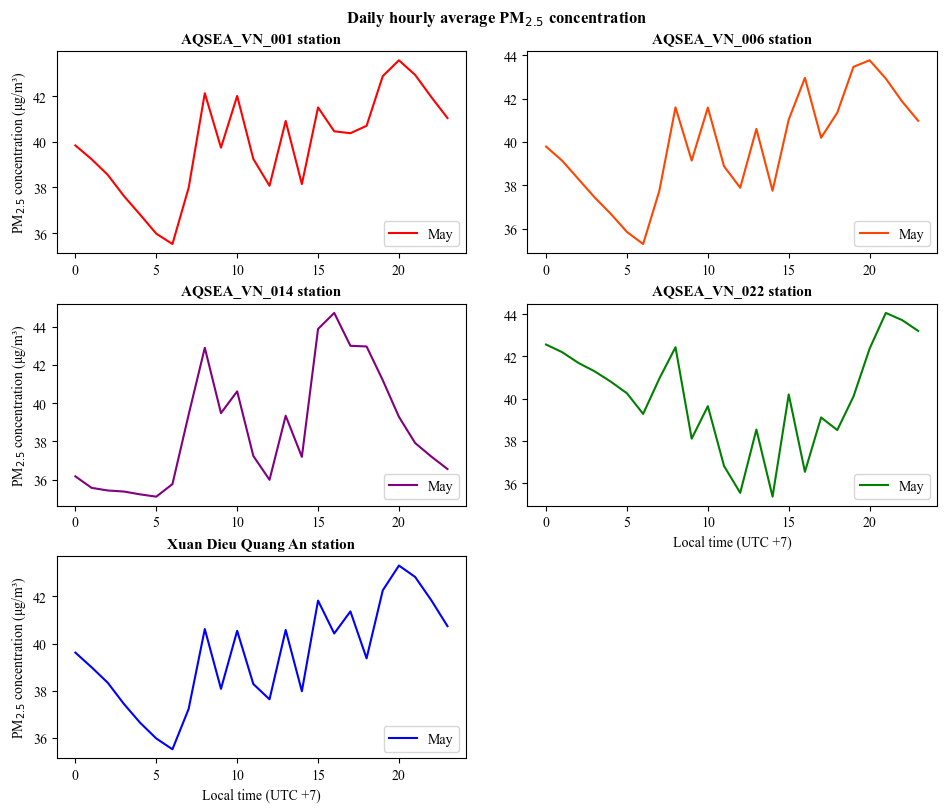

In [31]:
plt.rcParams['figure.figsize'] = (11, 12)
fig = plt.figure()
# 1. AQSEA_VN_001 station
ax1 = fig.add_subplot(4,2,1)
ax1.plot(mean_AQSEA_VN_001["Hour"].values, mean_AQSEA_VN_001["PM2.5"].values, color="red")
ax1.set_title('AQSEA_VN_001 station', fontsize=11, weight="bold")
ax1.set_xlabel(' ')
ax1.set_ylabel('PM$_{2.5}$ concentration (\u03BCg/m\u00b3)', fontsize=10)
ax1.legend(['May'], loc='lower right')

# 2. AQSEA_VN_006 station
ax2 = fig.add_subplot(4,2,2)
ax2.plot(mean_AQSEA_VN_006["Hour"].values, mean_AQSEA_VN_006["PM2.5"].values, color="orangered")
ax2.set_title('AQSEA_VN_006 station', fontsize=11, weight="bold")
ax2.set_xlabel(' ')
ax2.set_ylabel(' ', fontsize=10)
ax2.legend(['May'], loc='lower right')

# 3. AQSEA_VN_014 station
ax3 = fig.add_subplot(4,2,3)
ax3.plot(mean_AQSEA_VN_014["Hour"].values, mean_AQSEA_VN_014["PM2.5"].values, color="purple")
ax3.set_title('AQSEA_VN_014 station', fontsize=11, weight="bold")
ax3.set_xlabel(' ')
ax3.set_ylabel('PM$_{2.5}$ concentration (\u03BCg/m\u00b3)', fontsize=10)
ax3.legend(['May'], loc='lower right')

# 4. AQSEA_VN_022 station
ax4 = fig.add_subplot(4,2,4)
ax4.plot(mean_AQSEA_VN_022["Hour"].values, mean_AQSEA_VN_022["PM2.5"].values, color="green")
ax4.set_title('AQSEA_VN_022 station', fontsize=11, weight="bold")
ax4.set_xlabel('Local time (UTC +7)')
ax4.set_ylabel(' ', fontsize=10)
ax4.legend(['May'], loc='lower right')

# 5. Xuan Dieu Quang An station
ax5 = fig.add_subplot(4,2,5)
ax5.plot(mean_XuanDieuQuangAn["Hour"].values, mean_XuanDieuQuangAn["PM2.5"].values, color="blue")
ax5.set_title('Xuan Dieu Quang An station', fontsize=11, weight="bold")
ax5.set_xlabel('Local time (UTC +7)')
ax5.set_ylabel('PM$_{2.5}$ concentration (\u03BCg/m\u00b3)', fontsize=10)
ax5.legend(['May'], loc='lower right')

# Main graph title
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.25)
plt.suptitle("Daily hourly average PM$_{2.5}$ concentration", weight="bold", fontsize=12, y=0.935)
plt.show()

# Save time series plot
fig.savefig('F:/Wind_Vector/PM25_graph/Daily hourly average PM25 conc.jpg', format='jpg', dpi=500)
fig.savefig('F:/Wind_Vector/PM25_graph/Daily hourly average PM25 conc_large.jpg', format='jpg', dpi=1000)

In [21]:
min_value, max_value = mean_AQSEA_VN_001['PM2.5'].min(), mean_AQSEA_VN_001['PM2.5'].max()
print(f"Minimum value of pm2.5 of AQSEA_VN_001: {min_value}")
print(f"Maximum value of pm2.5 of AQSEA_VN_001: {max_value}")
print("-" * 30)
min_value, max_value = mean_AQSEA_VN_006['PM2.5'].min(), mean_AQSEA_VN_006['PM2.5'].max()
print(f"Minimum value of pm2.5 of AQSEA_VN_006: {min_value}")
print(f"Maximum value of pm2.5 of AQSEA_VN_006: {max_value}")
print("-" * 30)
min_value, max_value = mean_AQSEA_VN_014['PM2.5'].min(), mean_AQSEA_VN_014['PM2.5'].max()
print(f"Minimum value of pm2.5 of AQSEA_VN_014: {min_value}")
print(f"Maximum value of pm2.5 of AQSEA_VN_014: {max_value}")
print("-" * 30)
min_value, max_value = mean_AQSEA_VN_022['PM2.5'].min(), mean_AQSEA_VN_022['PM2.5'].max()
print(f"Minimum value of pm2.5 of AQSEA_VN_022: {min_value}")
print(f"Maximum value of pm2.5 of AQSEA_VN_022: {max_value}")
print("-" * 30)
min_value, max_value = mean_XuanDieuQuangAn['PM2.5'].min(), mean_XuanDieuQuangAn['PM2.5'].max()
print(f"Minimum value of pm2.5 of Xuan Dieu Quang An: {min_value}")
print(f"Maximum value of pm2.5 of Xuan Dieu Quang An: {max_value}")

Minimum value of pm2.5 of AQSEA_VN_001: 35.52303809504355
Maximum value of pm2.5 of AQSEA_VN_001: 43.5741153224822
------------------------------
Minimum value of pm2.5 of AQSEA_VN_006: 35.300830318081765
Maximum value of pm2.5 of AQSEA_VN_006: 43.765868525351245
------------------------------
Minimum value of pm2.5 of AQSEA_VN_014: 35.10516760426183
Maximum value of pm2.5 of AQSEA_VN_014: 44.72628974914551
------------------------------
Minimum value of pm2.5 of AQSEA_VN_022: 35.36217228058846
Maximum value of pm2.5 of AQSEA_VN_022: 44.06063393623598
------------------------------
Minimum value of pm2.5 of Xuan Dieu Quang An: 35.51514428661716
Maximum value of pm2.5 of Xuan Dieu Quang An: 43.30911402548513


In [22]:
list_variable = ["PM2.5", "PBL", "TEMP", "PRES", "WSPEED", "WDIR", "RH", "RAIN"]
print("Meteorology Information AQSEA_VN_001 Station:")
df_AQSEA_VN_001[list_variable].describe()

Meteorology Information AQSEA_VN_001 Station:


,PM2.5,PBL,TEMP,PRES,WSPEED,WDIR,RH,RAIN
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,39.886771,674.649768,303.249623,1001.583973,2.310989,136.149834,65.837808,15.223011
std,11.912159,868.896116,5.023206,3.951708,1.005449,69.596262,20.014155,12.815113
min,0.492882,36.362068,295.649750,992.741016,0.114109,0.611969,24.401764,0.000000
25%,32.102386,52.879253,299.248810,998.617852,1.588221,101.586185,51.393133,0.000000
50%,38.885042,53.624508,302.197525,1001.803984,2.111701,132.473724,68.080559,11.890182
75%,47.958681,1358.826172,306.550568,1004.108027,3.026065,142.658119,83.166788,25.468109
max,83.051552,2851.112305,315.690216,1009.507812,4.988529,358.396881,98.061028,35.925640


In [23]:
print("Meteorology Information AQSEA_VN_006 Station:")
df_AQSEA_VN_006[list_variable].describe()

Meteorology Information AQSEA_VN_006 Station:


,PM2.5,PBL,TEMP,PRES,WSPEED,WDIR,RH,RAIN
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,39.845319,740.142653,303.452992,1001.659306,2.517961,122.246277,64.831719,17.374446
std,12.007952,887.606160,5.064979,3.922873,1.121789,58.208021,19.909180,15.147824
min,0.437511,31.278984,295.913635,992.935391,0.047338,1.281677,23.742489,0.000000
25%,31.816065,52.890718,299.386864,998.668535,1.701406,92.619827,47.821017,0.000000
50%,38.802876,53.984364,302.237488,1001.904219,2.323950,128.914879,67.489491,16.800770
75%,47.566339,1528.823181,306.787453,1004.193281,3.420997,142.144466,82.377869,21.027472
max,100.165855,2813.510742,315.646484,1009.437812,6.176913,359.918762,97.364067,44.060135


In [24]:
print("Meteorology Information AQSEA_VN_014 Station:")
df_AQSEA_VN_014[list_variable].describe()

Meteorology Information AQSEA_VN_014 Station:


,PM2.5,PBL,TEMP,PRES,WSPEED,WDIR,RH,RAIN
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,38.646798,500.830280,301.564039,1003.022685,2.616568,112.935110,73.262935,9.315433
std,13.060742,571.439484,3.750999,3.548201,1.177555,33.721118,17.644871,7.372337
min,0.428856,52.222359,296.356842,995.882266,0.039420,0.402832,39.407631,2.633089
25%,29.282619,52.810933,298.431435,999.904688,1.851207,103.237774,56.950226,3.856048
50%,37.663364,53.120899,300.232773,1003.284180,2.675888,116.212929,75.926579,7.608747
75%,46.720659,917.994934,304.586235,1005.356758,3.474551,123.451805,88.983150,9.512228
max,117.124565,1973.182861,311.173553,1010.172812,4.864942,358.126801,99.403008,28.467295


In [25]:
print("Meteorology Information AQSEA_VN_022 Station:")
df_AQSEA_VN_022[list_variable].describe()

Meteorology Information AQSEA_VN_022 Station:


,PM2.5,PBL,TEMP,PRES,WSPEED,WDIR,RH,RAIN
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,40.138584,548.369597,302.514016,998.188209,2.243852,117.844905,67.710405,21.578199
std,12.924753,697.140212,4.393922,3.843591,1.069669,56.641231,16.848659,24.363801
min,0.359041,27.335758,295.033203,989.408828,0.053536,1.360901,30.589130,0.000000
25%,31.346604,52.765892,299.128769,995.274980,1.424181,83.540726,55.329435,0.000000
50%,38.819324,53.439075,301.625244,998.400312,2.207010,107.671547,69.158730,13.612740
75%,49.452579,1152.570648,305.469666,1000.697383,2.941575,147.133499,80.418255,18.883087
max,75.382103,2376.028320,313.740601,1005.980469,6.051287,359.518158,96.290047,65.372856


In [26]:
print("Meteorology Information Xuan Dieu Quang An Station:")
df_XuanDieuQuangAn[list_variable].describe()

Meteorology Information Xuan Dieu Quang An Station:


,PM2.5,PBL,TEMP,PRES,WSPEED,WDIR,RH,RAIN
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,39.475270,704.916534,303.332030,1001.660359,2.418788,108.283095,65.212547,10.599678
std,11.525090,852.170059,4.969163,3.950016,0.989300,47.202090,19.666493,8.292432
min,0.479378,27.844137,295.844391,992.741562,0.059854,0.832733,25.449997,0.000000
25%,32.010319,52.878662,299.316010,998.683652,1.726555,80.882751,49.477410,0.705610
50%,38.446009,53.838253,302.237823,1001.876797,2.237800,114.934448,67.499954,14.016195
75%,47.155820,1387.607086,306.858658,1004.181777,3.104641,136.385639,82.226816,15.121095
max,73.402672,2787.698975,315.055786,1009.585703,5.248660,355.808228,98.563721,22.012875


In [27]:
df = pd.DataFrame(columns = ["AQSEA_VN_001", "AQSEA_VN_006", "AQSEA_VN_014", "AQSEA_VN_022", "Xuan Dieu Quang An"])
df["AQSEA_VN_001"] = df_AQSEA_VN_001["PM2.5"]
df["AQSEA_VN_006"] = df_AQSEA_VN_006["PM2.5"]
df["AQSEA_VN_014"] = df_AQSEA_VN_014["PM2.5"]
df["AQSEA_VN_022"] = df_AQSEA_VN_022["PM2.5"]
df["Xuan Dieu Quang An"] = df_XuanDieuQuangAn["PM2.5"]
df.describe()

,AQSEA_VN_001,AQSEA_VN_006,AQSEA_VN_014,AQSEA_VN_022,Xuan Dieu Quang An
count,744.000000,744.000000,744.000000,744.000000,744.000000
mean,39.886771,39.845319,38.646798,40.138584,39.475270
std,11.912159,12.007952,13.060742,12.924753,11.525090
min,0.492882,0.437511,0.428856,0.359041,0.479378
25%,32.102386,31.816065,29.282619,31.346604,32.010319
50%,38.885042,38.802876,37.663364,38.819324,38.446009
75%,47.958681,47.566339,46.720659,49.452579,47.155820
max,83.051552,100.165855,117.124565,75.382103,73.402672


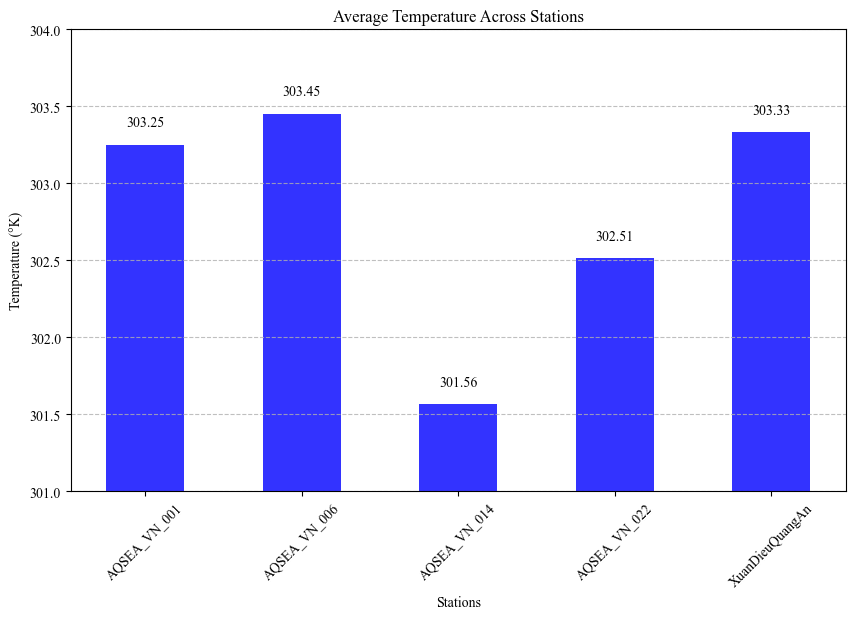

In [32]:
import matplotlib.pyplot as plt

# Data for temperature from each station
station_temps = [
    df_AQSEA_VN_001["TEMP"].mean(),
    df_AQSEA_VN_006["TEMP"].mean(),
    df_AQSEA_VN_014["TEMP"].mean(),
    df_AQSEA_VN_022["TEMP"].mean(),
    df_XuanDieuQuangAn["TEMP"].mean()
]

# Station names
stations = ['AQSEA_VN_001', 'AQSEA_VN_006', 'AQSEA_VN_014', 'AQSEA_VN_022', 'XuanDieuQuangAn']

# Plotting the bar chart with narrower width
plt.figure(figsize=(10, 6))
bars = plt.bar(stations, station_temps, color='blue', width=0.5, alpha=0.8)  # Adjust the width here
plt.xlabel('Stations')
plt.ylabel('Temperature (°K)')
plt.title('Average Temperature Across Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Set y-axis limits starting from 280 and incrementing by 0.2
plt.ylim(301, 304)

# Annotate each bar with its value
for bar, temp in zip(bars, station_temps):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(temp, 2), ha='center', va='bottom')

# Show plot
plt.show()

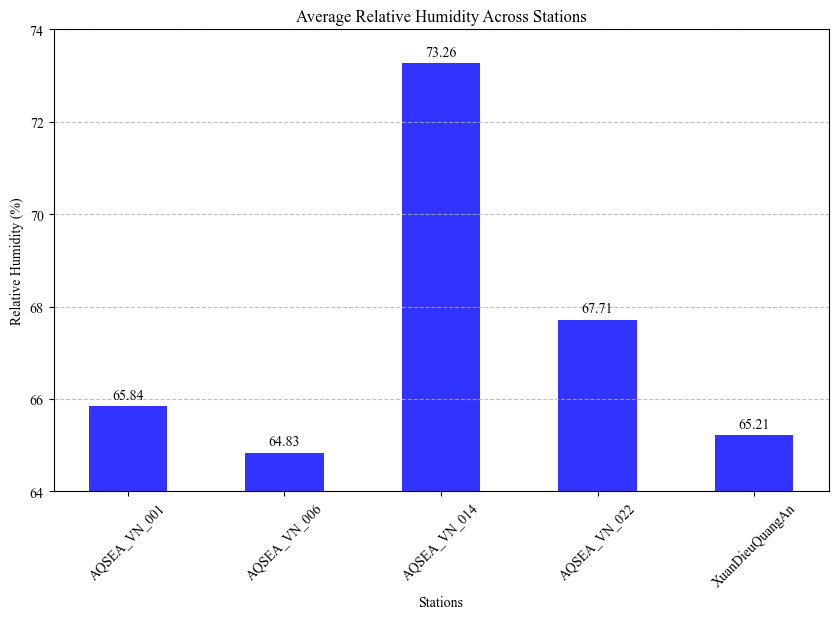

In [33]:
import matplotlib.pyplot as plt

# Data for temperature from each station
station_temps = [
    df_AQSEA_VN_001["RH"].mean(),
    df_AQSEA_VN_006["RH"].mean(),
    df_AQSEA_VN_014["RH"].mean(),
    df_AQSEA_VN_022["RH"].mean(),
    df_XuanDieuQuangAn["RH"].mean()
]

# Station names
stations = ['AQSEA_VN_001', 'AQSEA_VN_006', 'AQSEA_VN_014', 'AQSEA_VN_022', 'XuanDieuQuangAn']

# Plotting the bar chart with narrower width
plt.figure(figsize=(10, 6))
bars = plt.bar(stations, station_temps, color='blue', width=0.5, alpha=0.8)  # Adjust the width here
plt.xlabel('Stations')
plt.ylabel('Relative Humidity (%)')
plt.title('Average Relative Humidity Across Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Set y-axis limits starting from 280 and incrementing by 0.2
plt.ylim(64, 74)

# Annotate each bar with its value
for bar, temp in zip(bars, station_temps):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(temp, 2), ha='center', va='bottom')

# Show plot
plt.show()

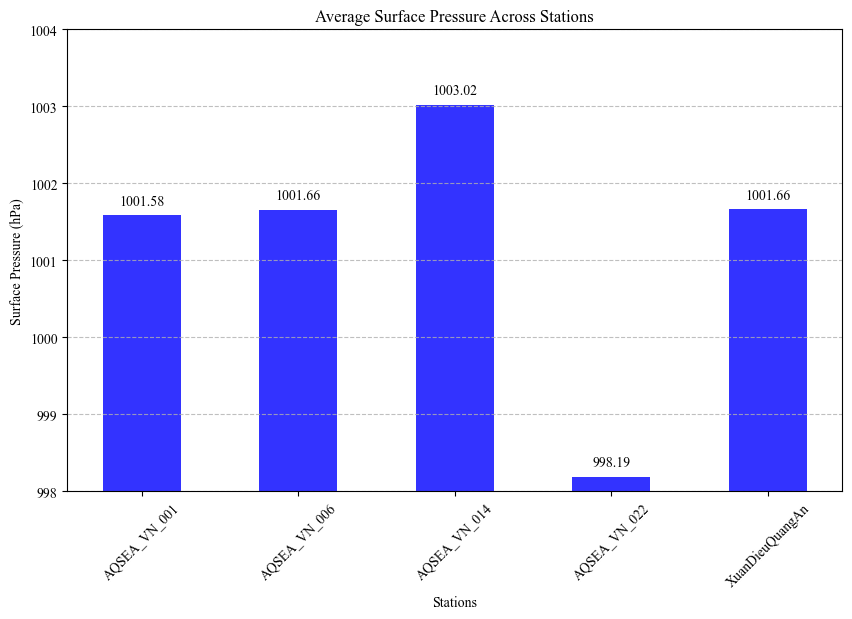

In [34]:
import matplotlib.pyplot as plt

# Data for temperature from each station
station_temps = [
    df_AQSEA_VN_001["PRES"].mean(),
    df_AQSEA_VN_006["PRES"].mean(),
    df_AQSEA_VN_014["PRES"].mean(),
    df_AQSEA_VN_022["PRES"].mean(),
    df_XuanDieuQuangAn["PRES"].mean()
]

# Station names
stations = ['AQSEA_VN_001', 'AQSEA_VN_006', 'AQSEA_VN_014', 'AQSEA_VN_022', 'XuanDieuQuangAn']

# Plotting the bar chart with narrower width
plt.figure(figsize=(10, 6))
bars = plt.bar(stations, station_temps, color='blue', width=0.5, alpha=0.8)  # Adjust the width here
plt.xlabel('Stations')
plt.ylabel('Surface Pressure (hPa)')
plt.title('Average Surface Pressure Across Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Set y-axis limits starting from 280 and incrementing by 0.2
plt.ylim(998, 1004)

# Annotate each bar with its value
for bar, temp in zip(bars, station_temps):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(temp, 2), ha='center', va='bottom')

# Show plot
plt.show()